In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel("flight_price.xlsx")

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Now we will perform Data cleaning

In [10]:
df.shape

(10683, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
## Check the missing value present in the dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.drop('Route', inplace = True, axis = 1 )

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [27]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [31]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)                              

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [35]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [37]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [39]:
df['dep_hours'] = df['Dep_Time'].str.split(':').str[0]
df['dep_minutes'] = df['Dep_Time'].str.split(':').str[0]

In [41]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,05
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,09
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,18
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,16


In [43]:
df['dep_hours'] = df['dep_hours'].astype(int)
df['dep_minutes'] = df['dep_minutes'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  dep_hours        10683 non-null  int32 
 13  dep_minutes      10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [47]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [49]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,5


In [51]:
df['Arrival_hours'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [53]:
df['Arrival_minutes']

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_minutes, Length: 10683, dtype: object

In [55]:
df['Arrival_hours']

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hours, Length: 10683, dtype: object

In [57]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Arrival_Time     10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  dep_hours        10683 non-null  int32 
 12  dep_minutes      10683 non-null  int32 
 13  Arrival_hours    10683 non-null  int32 
 14  Arrival_minutes  10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [61]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,15


In [63]:
df.drop('Arrival_Time', axis = 1, inplace = True)

In [65]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,15


In [67]:
df['Duration_hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [69]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,9,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,18,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,16,21,35,4,45


In [71]:
df['Duration_hours'] = pd.to_numeric(df['Duration_hours'], errors='coerce')
df['Duration_minutes'] = pd.to_numeric(df['Duration_minutes'], errors='coerce')

In [73]:
df['Duration_hours'] = df['Duration_hours'].astype(float)

In [75]:
df['Duration_minutes'] = df['Duration_minutes'].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Duration          10683 non-null  object 
 4   Total_Stops       10682 non-null  object 
 5   Additional_Info   10683 non-null  object 
 6   Price             10683 non-null  int64  
 7   Date              10683 non-null  int32  
 8   Month             10683 non-null  int32  
 9   Year              10683 non-null  int32  
 10  dep_hours         10683 non-null  int32  
 11  dep_minutes       10683 non-null  int32  
 12  Arrival_hours     10683 non-null  int32  
 13  Arrival_minutes   10683 non-null  int32  
 14  Duration_hours    10682 non-null  float64
 15  Duration_minutes  9651 non-null   float64
dtypes: float64(2), int32(7), int64(1), objec

In [79]:
df.drop('Duration', axis = 1 , inplace = True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Total_Stops       10682 non-null  object 
 4   Additional_Info   10683 non-null  object 
 5   Price             10683 non-null  int64  
 6   Date              10683 non-null  int32  
 7   Month             10683 non-null  int32  
 8   Year              10683 non-null  int32  
 9   dep_hours         10683 non-null  int32  
 10  dep_minutes       10683 non-null  int32  
 11  Arrival_hours     10683 non-null  int32  
 12  Arrival_minutes   10683 non-null  int32  
 13  Duration_hours    10682 non-null  float64
 14  Duration_minutes  9651 non-null   float64
dtypes: float64(2), int32(7), int64(1), object(5)
memory usage: 959.9+ KB


In [83]:
## for columns Airline, Source, Destination we will apply OneHotEncoding for converting Categorical to Numeric data

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
encoder = OneHotEncoder()

In [89]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [91]:
df1 = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(), columns = encoder.get_feature_names_out())

In [93]:
df1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
pd.concat([df,df1],axis = True)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Total_Stops       10682 non-null  object 
 4   Additional_Info   10683 non-null  object 
 5   Price             10683 non-null  int64  
 6   Date              10683 non-null  int32  
 7   Month             10683 non-null  int32  
 8   Year              10683 non-null  int32  
 9   dep_hours         10683 non-null  int32  
 10  dep_minutes       10683 non-null  int32  
 11  Arrival_hours     10683 non-null  int32  
 12  Arrival_minutes   10683 non-null  int32  
 13  Duration_hours    10682 non-null  float64
 14  Duration_minutes  9651 non-null   float64
dtypes: float64(2), int32(7), int64(1), object(5)
memory usage: 959.9+ KB


In [99]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,22,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,5,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,9,4,25,19.0,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,18,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,16,21,35,4.0,45.0


In [101]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [103]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [105]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0 , '2 stops': 2 , '1 stop': 1 , '3 stops': 3, np.nan:1, '4 stops': 4})

In [107]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [109]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,22,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,5,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,9,4,25,19.0,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,18,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,16,21,35,4.0,45.0


In [111]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [113]:
df['Additional_Info'].mode()

0    No info
Name: Additional_Info, dtype: object

EDA Analysis

In [116]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
dep_hours              0
dep_minutes            0
Arrival_hours          0
Arrival_minutes        0
Duration_hours         1
Duration_minutes    1032
dtype: int64

In [118]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,22,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,5,13,15,7.0,25.0


<Axes: >

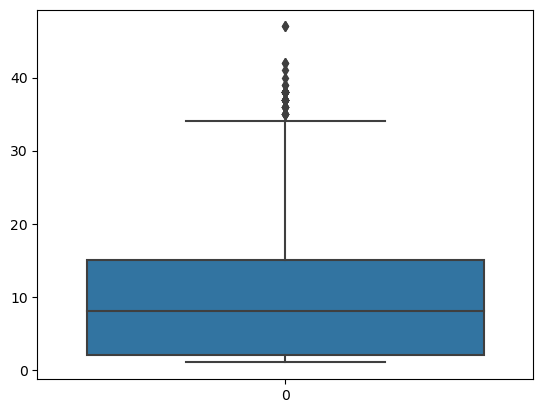

In [120]:
## To check the Outliyers
sns.boxplot(df['Duration_hours'])

In [122]:
df['Duration_hours'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2.0
1         7.0
2        19.0
3         5.0
4         4.0
         ... 
10678     2.0
10679     2.0
10680     3.0
10681     2.0
10682     8.0
Name: Duration_hours, Length: 10683, dtype: float64>

In [124]:
df['duration_hours_median'] = df['Duration_hours'].median()

In [126]:
df['duration_hours_median'] = df['Duration_hours'].fillna(df['Duration_hours'].median())

In [128]:
df.drop('Duration_hours', axis = 1, inplace = True)

In [130]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,Duration_minutes,duration_hours_median
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,22,1,10,50.0,2.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,5,13,15,25.0,7.0


In [132]:
df['Duration_minutes'].value_counts()

Duration_minutes
30.0    1446
20.0     997
50.0     972
35.0     939
55.0     910
15.0     903
45.0     896
25.0     803
40.0     637
5.0      623
10.0     525
Name: count, dtype: int64

<Axes: >

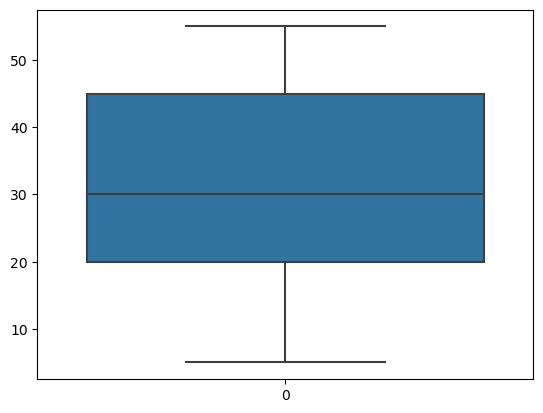

In [134]:
sns.boxplot(df['Duration_minutes'])

In [136]:
df['Duration_minutes_mean'] = df['Duration_minutes'].mean()

In [138]:
df['Duration_minutes_mean'] = df['Duration_minutes'].fillna(df['Duration_minutes'].mean())

In [140]:
df.drop('Duration_minutes', axis = 1 , inplace = True)

In [142]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,duration_hours_median,Duration_minutes_mean
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,22,1,10,2.0,50.000000
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,5,13,15,7.0,25.000000
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,9,4,25,19.0,31.356336
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,18,23,30,5.0,25.000000
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,16,21,35,4.0,45.000000


In [144]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
dep_hours                0
dep_minutes              0
Arrival_hours            0
Arrival_minutes          0
duration_hours_median    0
Duration_minutes_mean    0
dtype: int64

Now there is no missing value

In [147]:
## Check the duplicates data
df.duplicated().sum()

222

In [149]:
## Removing all the duplicates data
df.drop_duplicates(inplace = True)

In [151]:
df.shape

(10461, 15)

In [153]:
df.describe()

,Total_Stops,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,duration_hours_median,Duration_minutes_mean
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.0,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.802505,9027.212504,13.462480,4.701845,2019.0,12.476341,12.476341,13.389638,24.723258,10.029729,31.222108
std,0.660550,4624.861032,8.466967,1.163624,0.0,5.726072,5.726072,6.853854,16.569495,8.378098,14.149829
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,8.000000,8.000000,10.000000,2.000000,20.000000
50%,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,11.000000,14.000000,25.000000,8.000000,31.356336
75%,1.000000,12346.000000,21.000000,6.000000,2019.0,18.000000,18.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,23.000000,23.000000,55.000000,47.000000,55.000000


More visualization with graphically

In [156]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hours,dep_minutes,Arrival_hours,Arrival_minutes,duration_hours_median,Duration_minutes_mean
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,22,1,10,2.0,50.000000
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,5,13,15,7.0,25.000000
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,9,4,25,19.0,31.356336
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,18,23,30,5.0,25.000000
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,16,21,35,4.0,45.000000


<Axes: xlabel='Airline', ylabel='Price'>

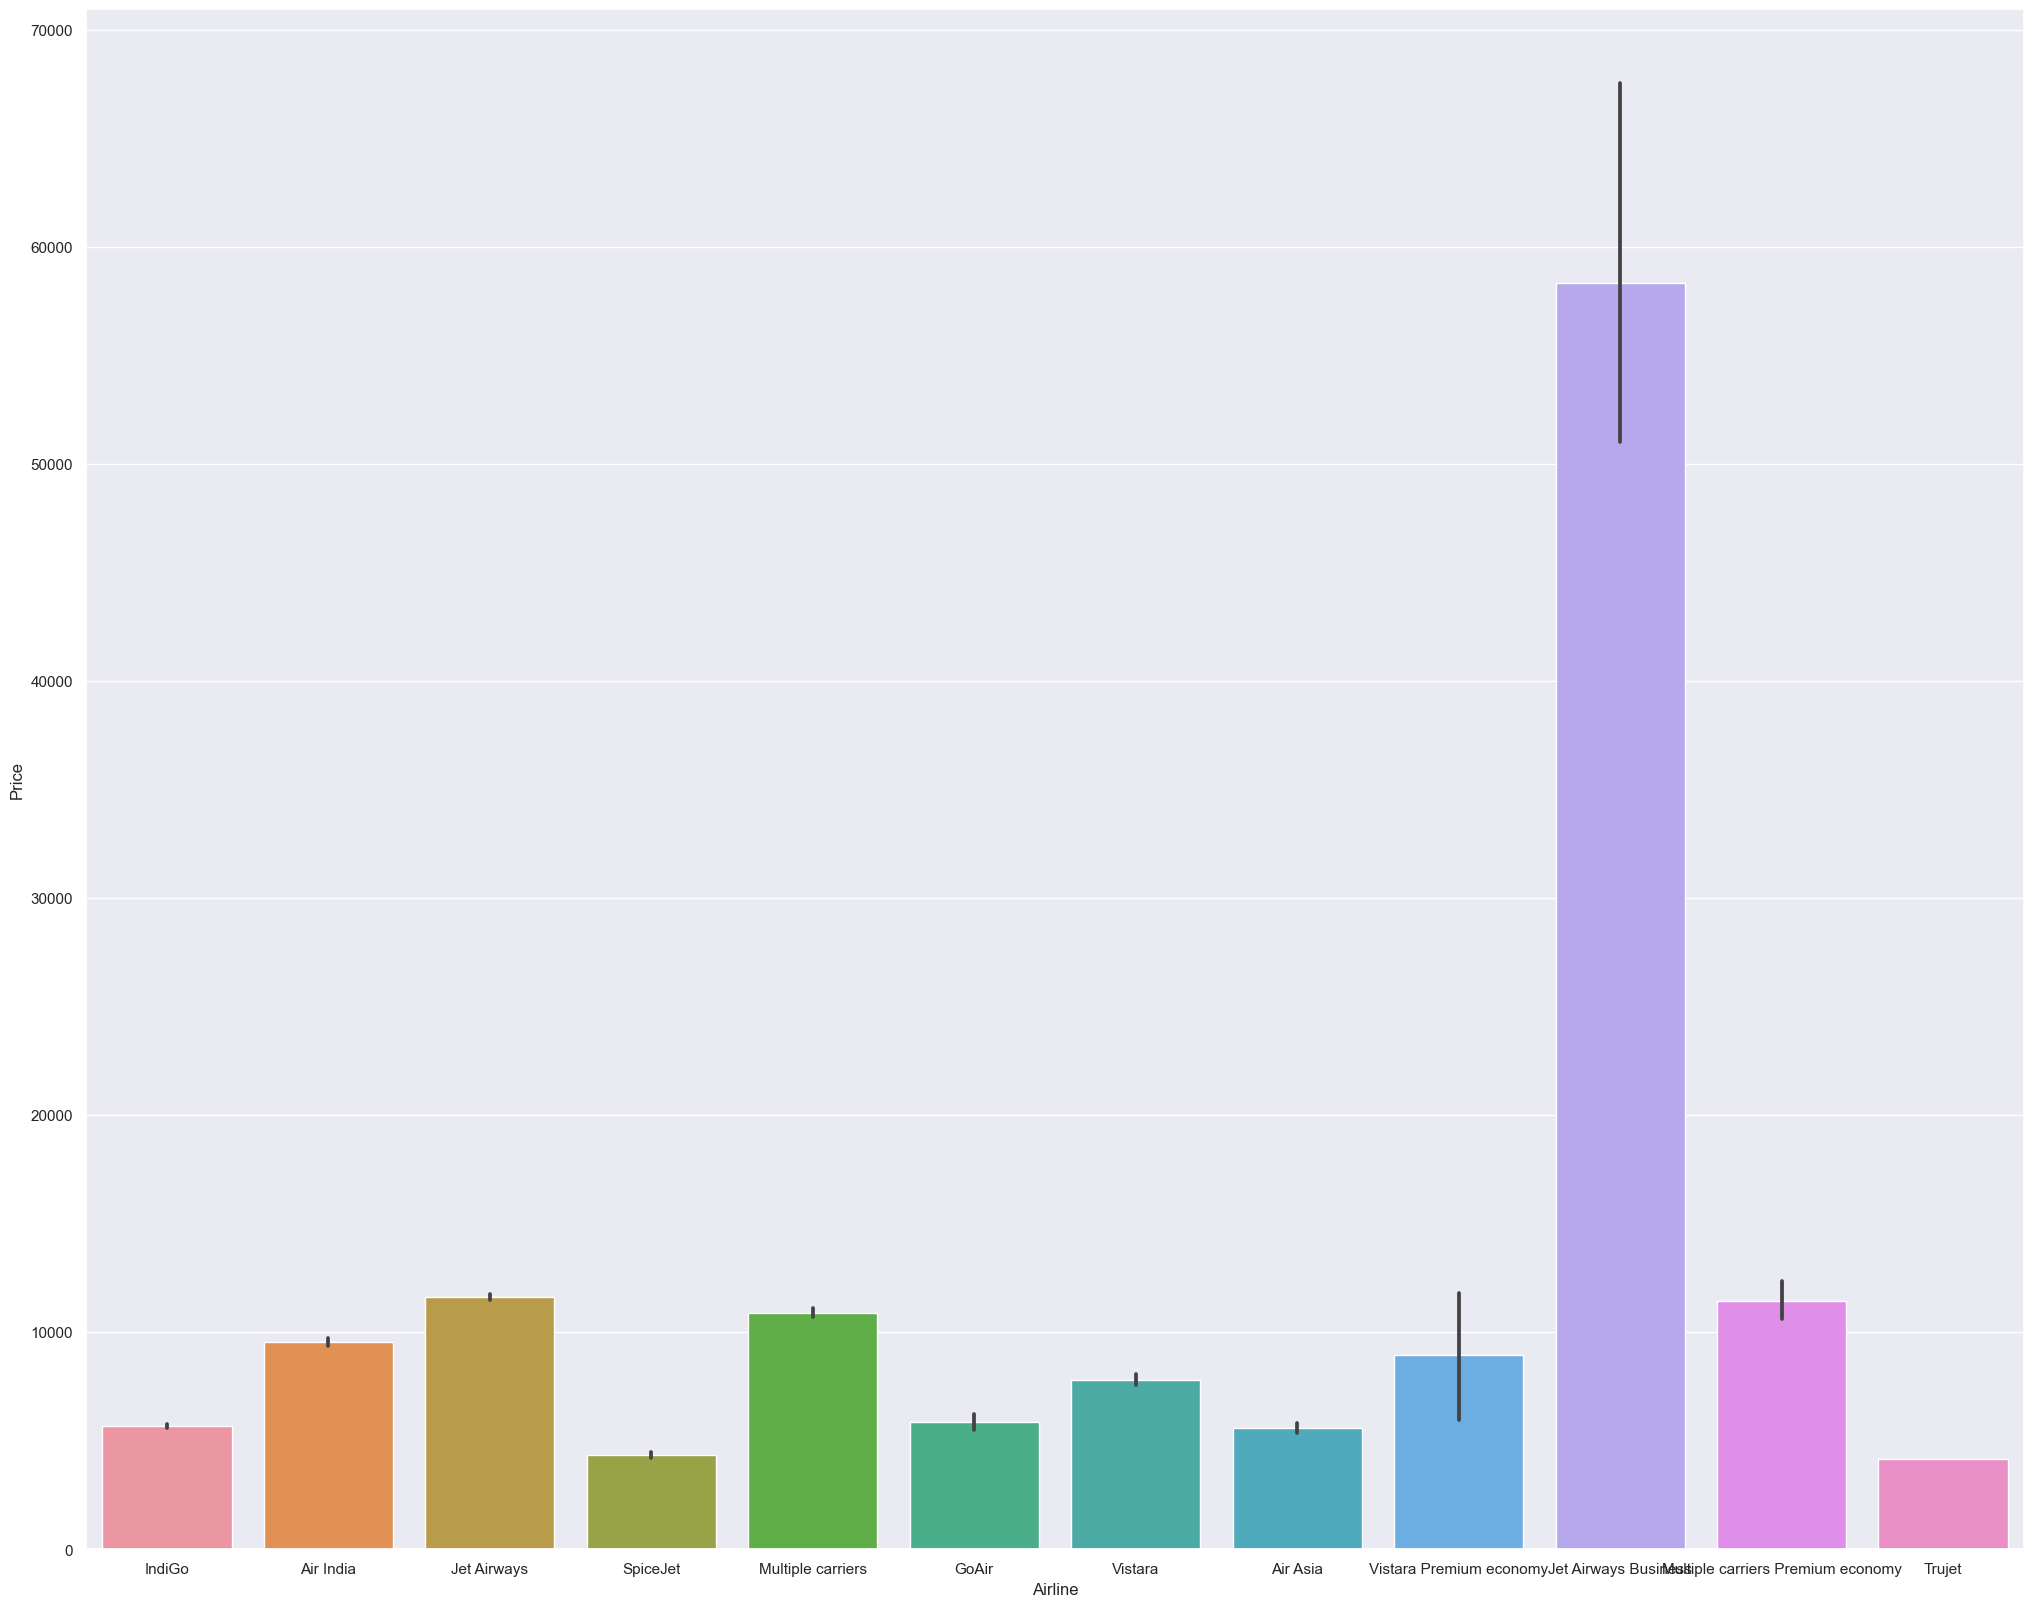

In [158]:
df.groupby(['Airline'],as_index=False)['Price'].sum().sort_values(by='Price',ascending=False)
sns.set(rc={'figure.figsize':(25,20)})
sns.barplot(x ='Airline',y='Price',data=df )

Observation:From this graph we see that The most expensive Airlines are Jet Airways Business, Jet Airways,Multiple carries,Air India and continue

<Axes: xlabel='Source', ylabel='Destination'>

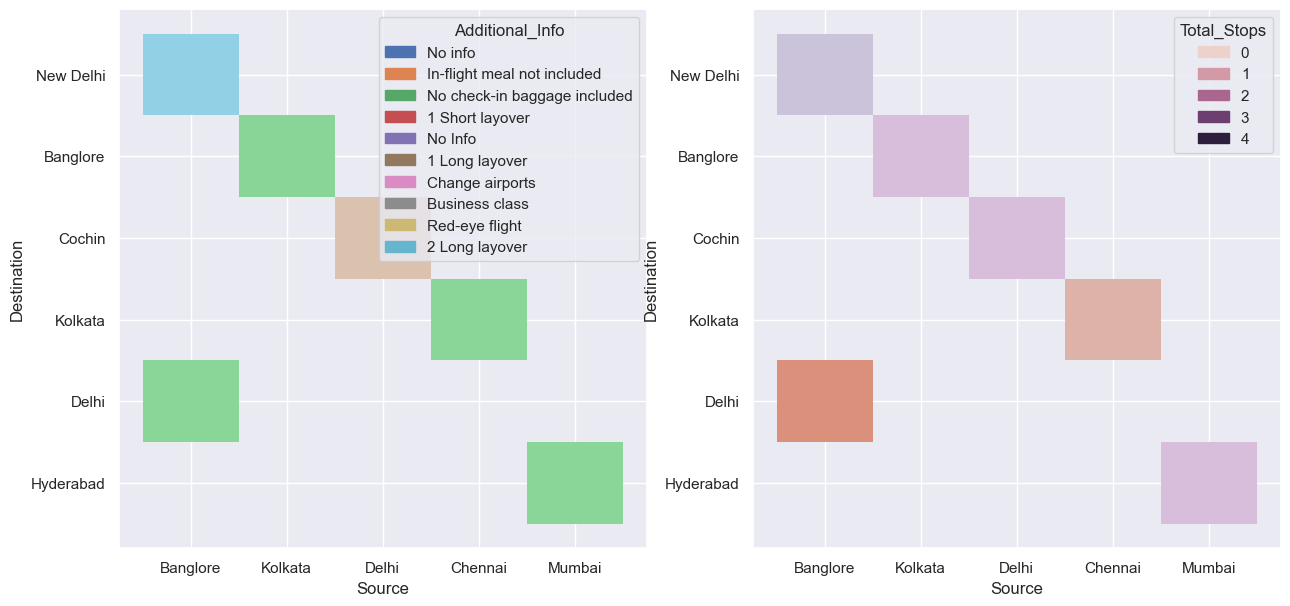

In [161]:
plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'Source', bins = 30, kde = True, y = 'Destination', hue = 'Additional_Info')
plt.subplot(122)
sns.histplot(data = df, x = 'Source', bins = 30, kde = True, y = 'Destination', hue = 'Total_Stops')

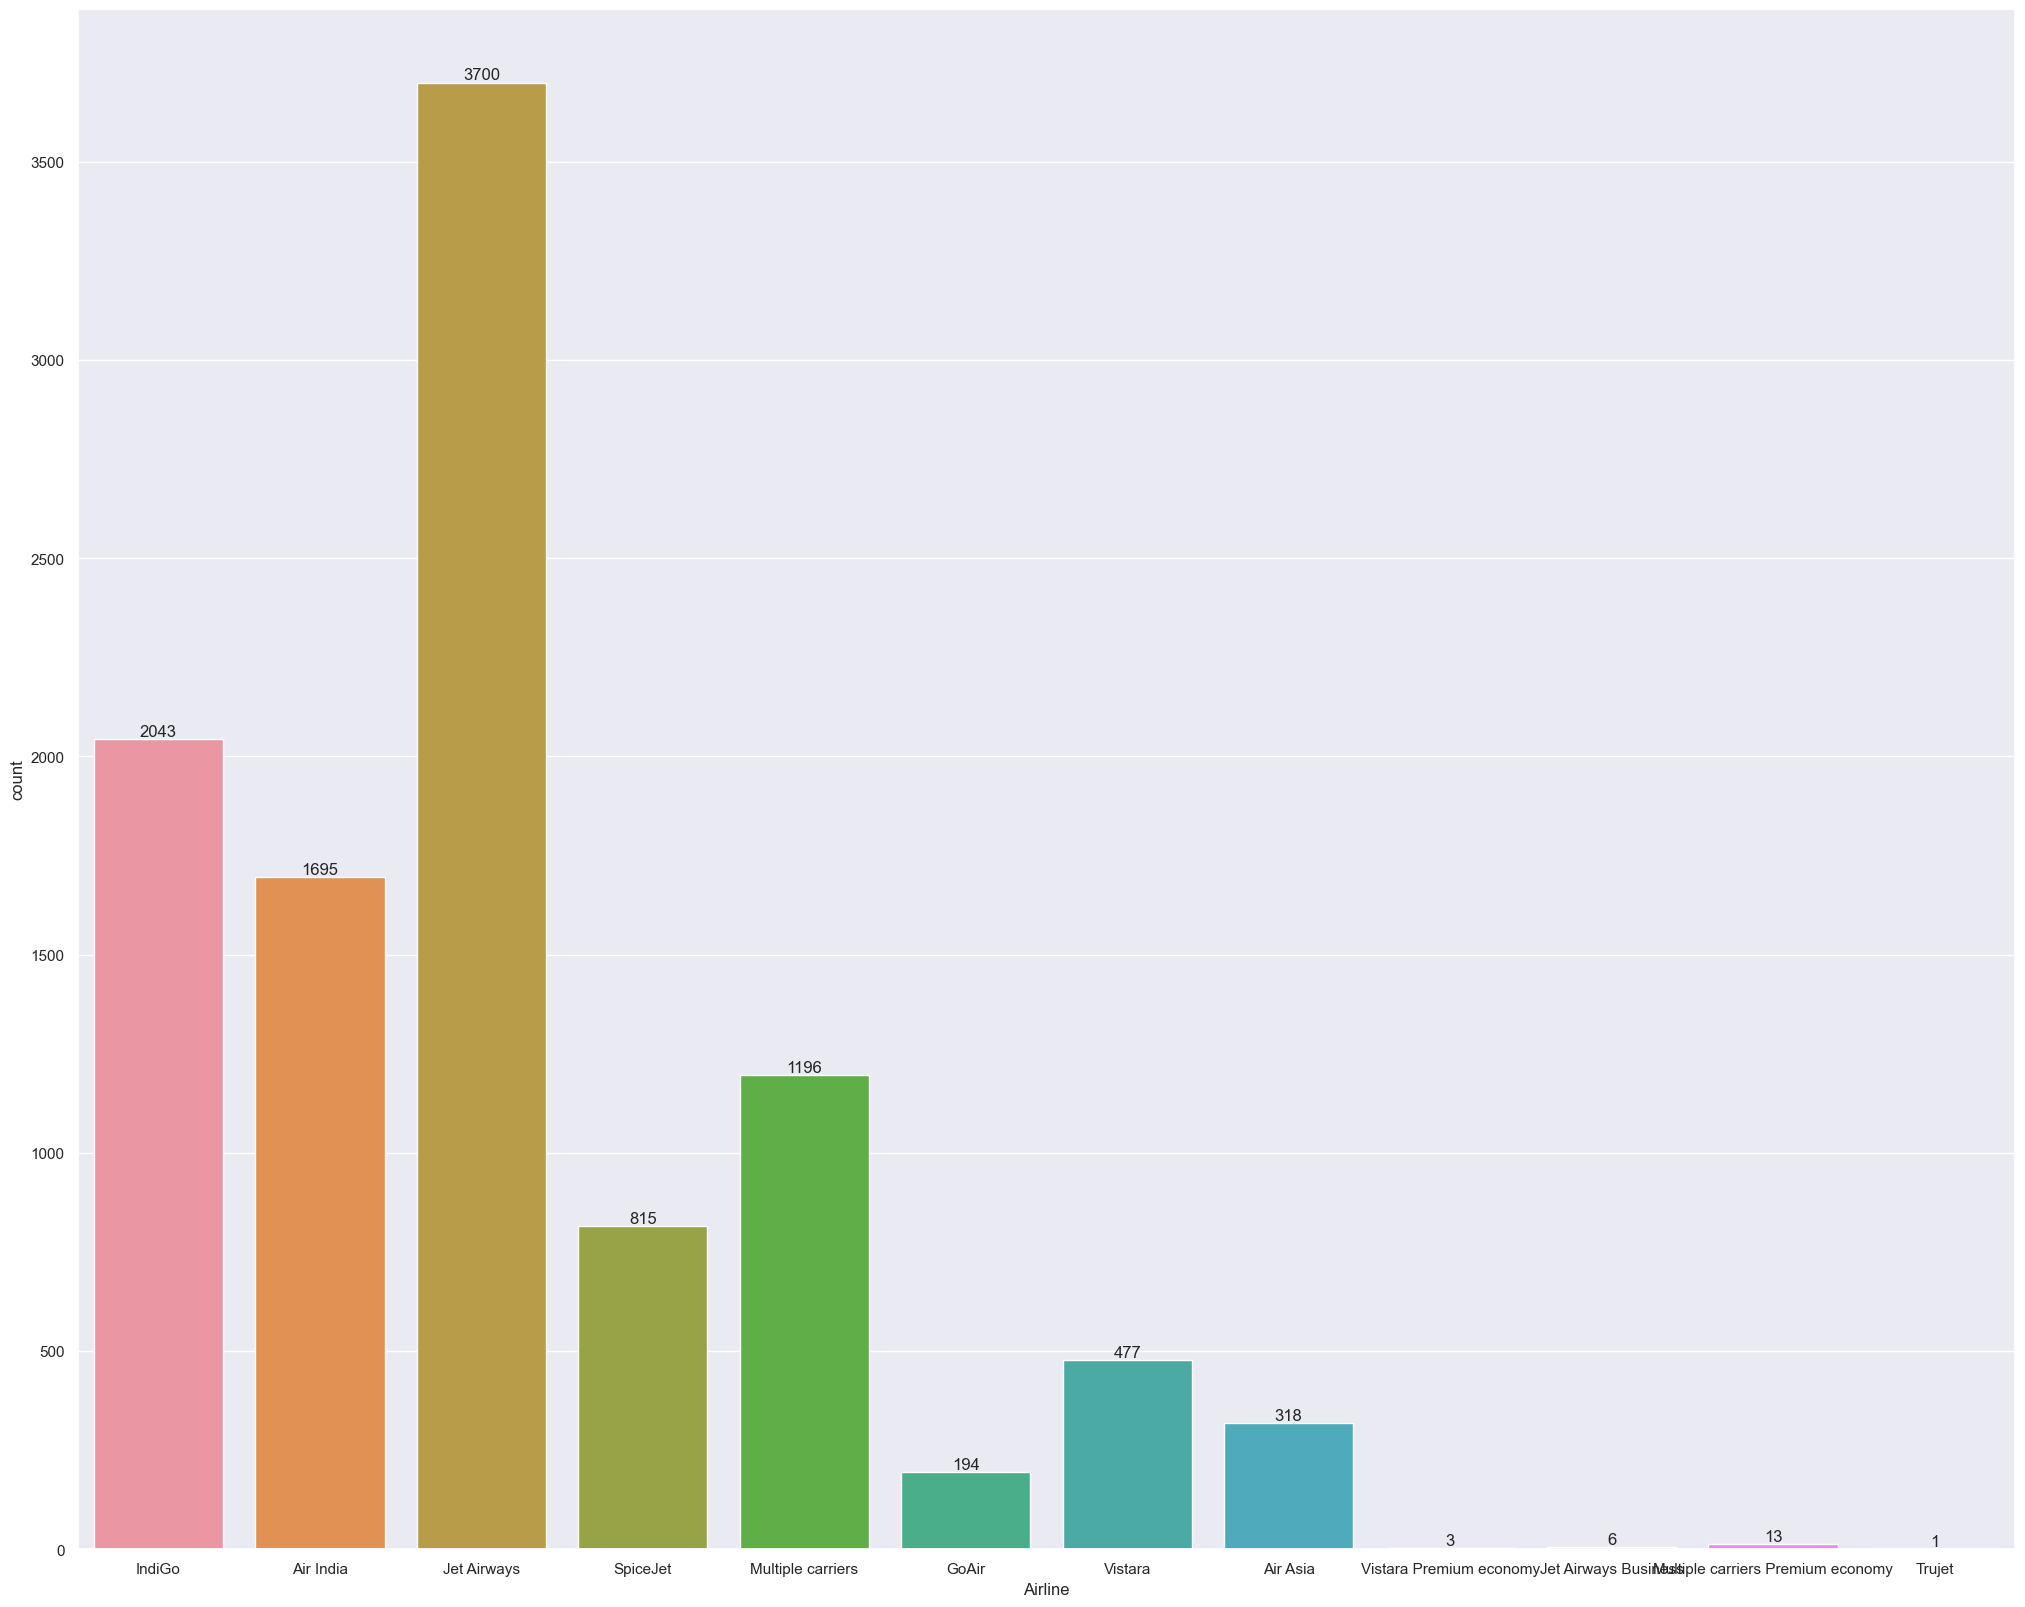

In [162]:
ax =sns.countplot(x='Airline',data = df)
sns.set(rc={'figure.figsize':(25,15)})
for bars in ax.containers:
    ax.bar_label(bars)

The maximum no of Airlines are Jet Airways 3700, IndiGo 2043, Air india 1695 and continue

<Axes: ylabel='count'>

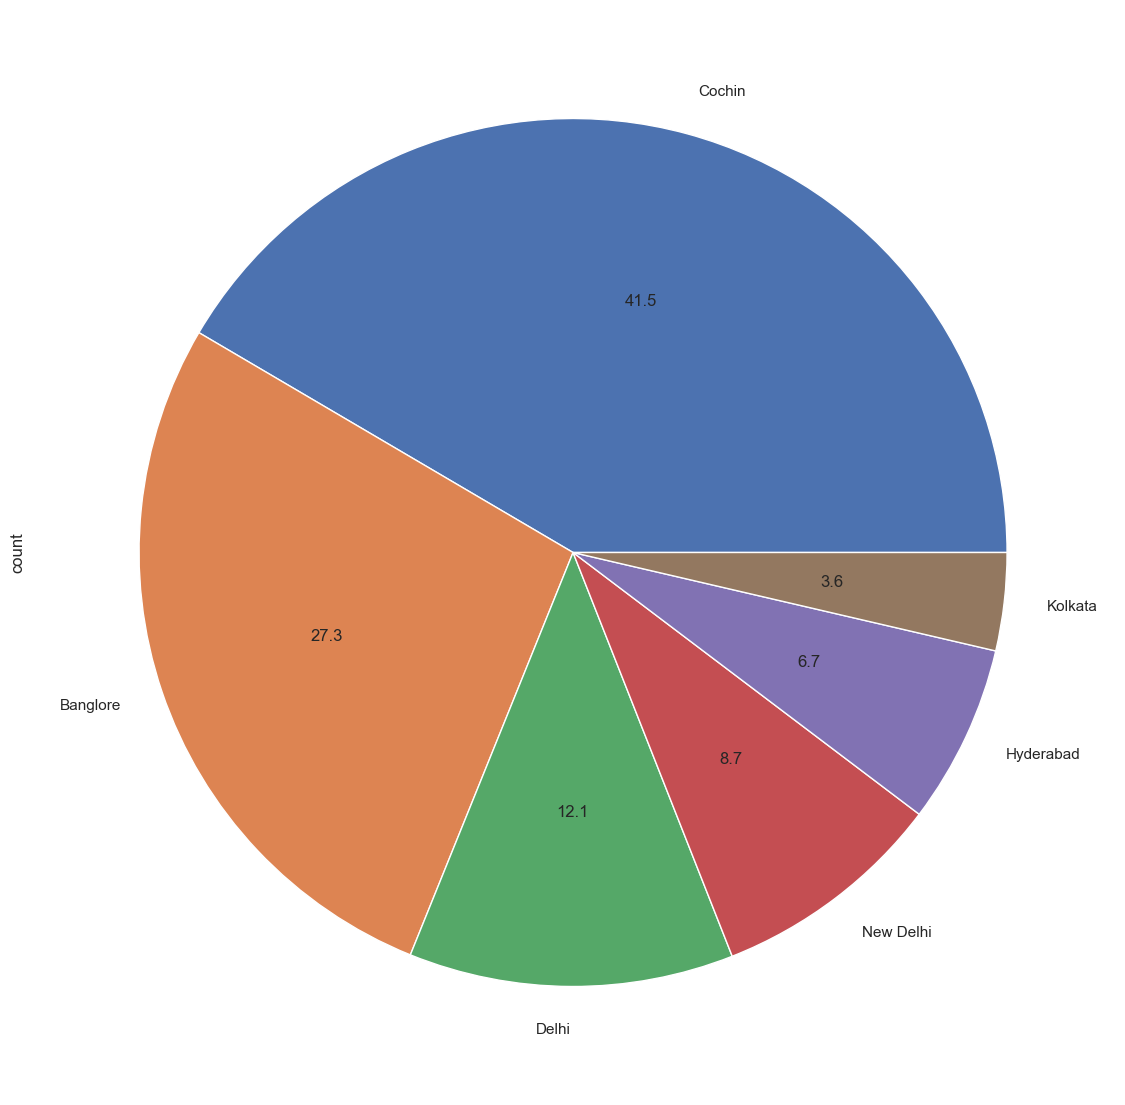

In [165]:
df['Destination'].value_counts().plot.pie(y = df['Destination'], figsize = (14,15), autopct = '%1.1f')

From the pie chart we can see that the most busiest airports in India are Cochine, Banglore, Delhi , new Delhi etc

<Axes: ylabel='count'>

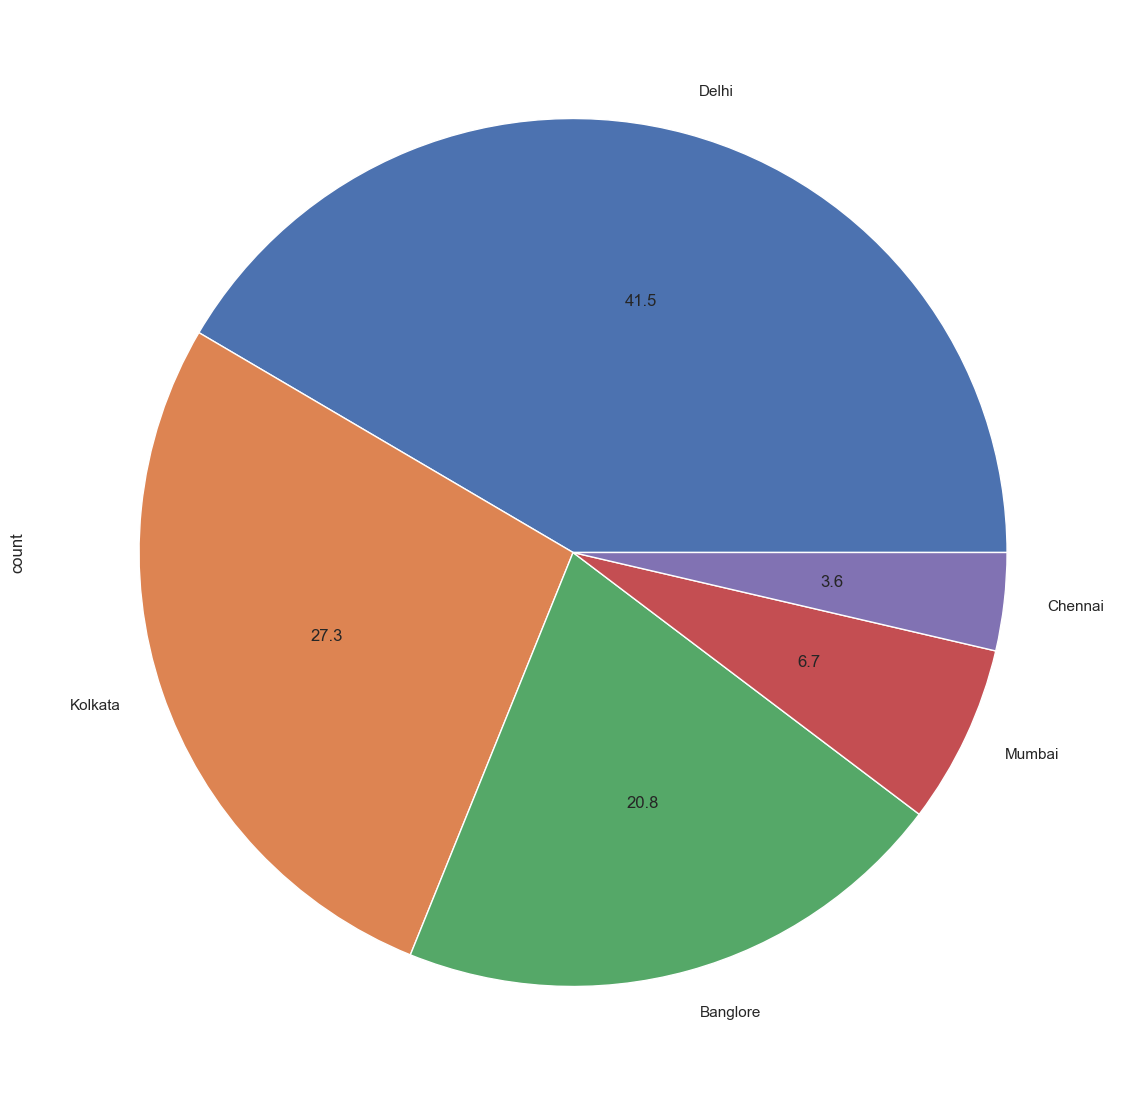

In [169]:
df['Source'].value_counts().plot.pie(y = df['Source'], figsize = (14,15), autopct = '%1.1f')

From the pie chart we can see that the most busiest airports in India are Delhi, Kolkata, Banglore, mumbai etc

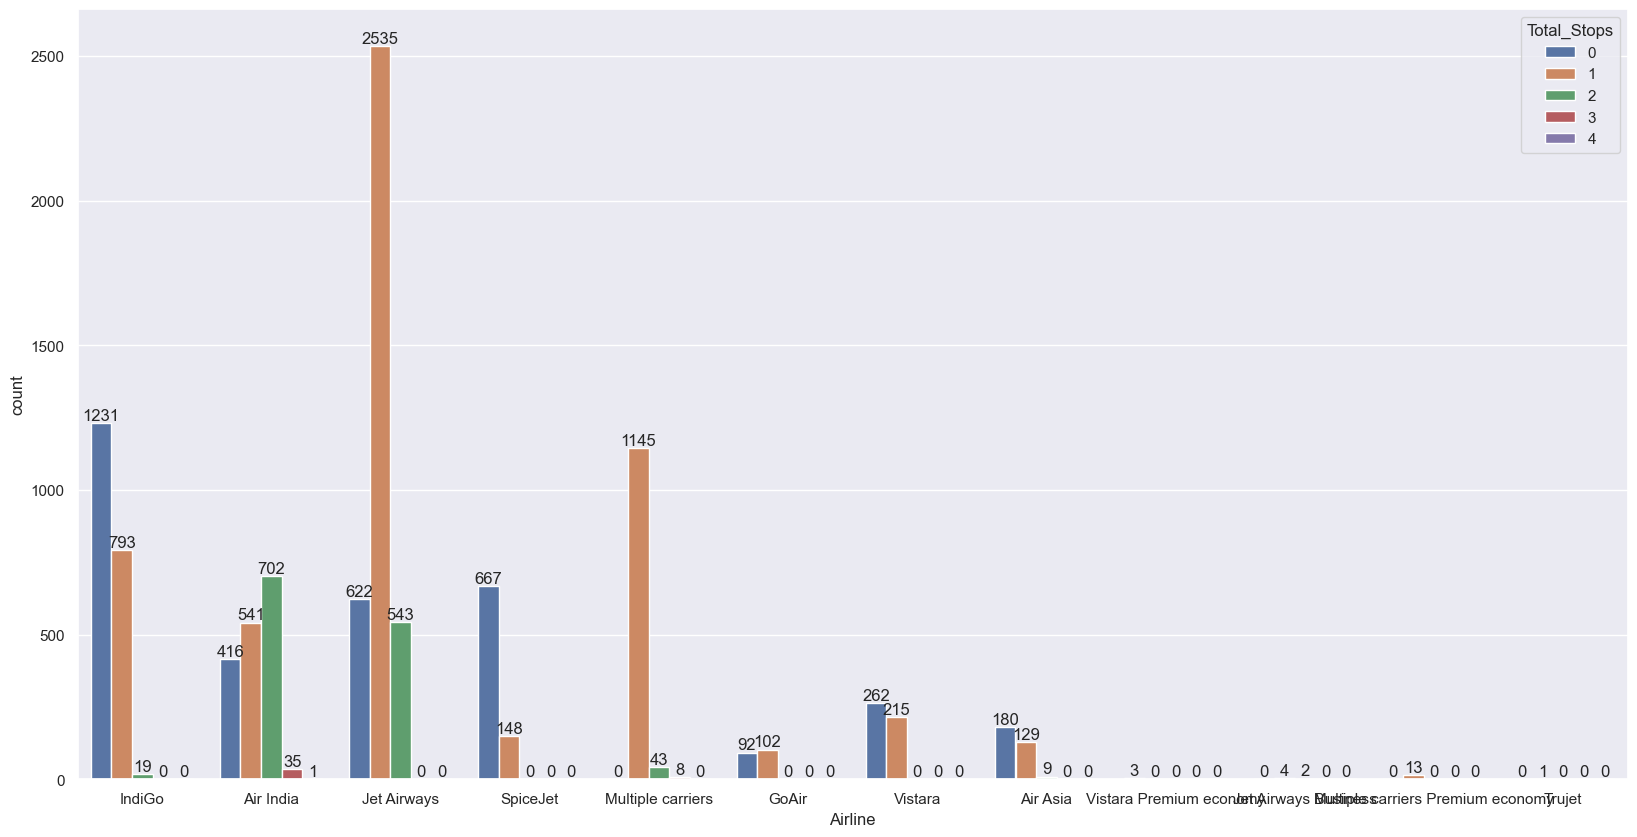

In [172]:
plt.figure(figsize= (20,10))
ax = sns.countplot(x = 'Airline',data = df,hue = 'Total_Stops' )
for bars in ax.containers:
    ax.bar_label(bars)

The maximum no of stops are Jet airways , Indigo etc

Importance Insights:

1.The most expansive Airlines are Jet Airways Business, Jet Airways,Multiple carries,Air India 

2.the most busiest destinations in India are Delhi, Kolkata, Banglore, mumbai

3.Busiest Sources in India are Cochine, Banglore, Delhi , new Delh etc

4.The no of total stops of Jet Airways is maximum 2535, Indigo 1231 